**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Active Class 3**

*   M3: Análisis, visualización y transformación de datos

---

In [23]:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


En esta actividad usarás el archivo de datos `fitness.csv`, donde se ha recopilado información sobre las personas que compraron una cinta de correr en una tienda minorista durante tres meses.

* `Product`: Producto adquirido (TM195, TM498 o TM798)
* `Age`: Edad en años
* `Gender`: Género
* `Education`: Educación en años
* `MaritalStatus`: Estado civil (soltero o en pareja)
* `Usage`: Número promedio de veces que el cliente planea usar la máquina para correr cada semana
* `Fitness`: Aptitud autoevaluada en una escala del 1 al 5, donde 1 es mala forma y 5 es excelente forma
* `Income`: Ingreso anual del hogar
* `Miles`: Número promedio de millas que el cliente espera caminar/correr cada semana

Descarga el archivo: `fitness.csv` y guarda, en un dataframe (`fit_df`), todos sus registros.

In [2]:
import pandas as pd
fit_df = pd.read_csv('../datasets/fitness.csv')
fit_df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,TM798,40,Male,21,Single,6,5,83416,200
176,TM798,42,Male,18,Single,5,4,89641,200
177,TM798,45,Male,16,Single,5,5,90886,160
178,TM798,47,Male,18,Partnered,4,5,104581,120


In [3]:
# Librerías para visualización
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
fit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [5]:
# Determinando la cantidad de valores únicos por columna
fit_df.nunique()

Product           3
Age              32
Gender            2
Education         8
MaritalStatus     2
Usage             6
Fitness           5
Income           62
Miles            37
dtype: int64

In [7]:
# Estadísticas descriptivas de las variables numéricas
fit_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,180.0,28.788889,6.943498,18.0,24.00,26.0,33.00,50.0
Education,180.0,15.572222,1.617055,12.0,14.00,16.0,16.00,21.0
Usage,180.0,3.455556,1.084797,2.0,3.00,3.0,4.00,7.0
Fitness,180.0,3.311111,0.958869,1.0,3.00,3.0,4.00,5.0
Income,180.0,53719.577778,16506.684226,29562.0,44058.75,50596.5,58668.00,104581.0
Miles,180.0,103.194444,51.863605,21.0,66.00,94.0,114.75,360.0


In [8]:
# Estadísticas descriptivas de las variables de texto
fit_df.describe(include = 'object').T

,count,unique,top,freq
Product,180,3,TM195,80
Gender,180,2,Male,104
MaritalStatus,180,2,Partnered,107


In [9]:
# Se hace una lista de variables numéricas y otra de categóricas
num_cols = ['Age', 'Education', 'Usage', 'Income', 'Miles']
cat_cols = ['Product', 'Gender', 'MaritalStatus', 'Fitness']

In [10]:
# Recuento de cada categoría única en las variables categóricas
for column in cat_cols:
    print(column)
    print(fit_df[column].value_counts())
    print('-' * 50)

Product
TM195    80
TM498    60
TM798    40
Name: Product, dtype: int64
--------------------------------------------------
Gender
Male      104
Female     76
Name: Gender, dtype: int64
--------------------------------------------------
MaritalStatus
Partnered    107
Single        73
Name: MaritalStatus, dtype: int64
--------------------------------------------------
Fitness
3    97
5    31
2    26
4    24
1     2
Name: Fitness, dtype: int64
--------------------------------------------------


In [11]:
# Comprobando valores faltantes
fit_df.isna().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

## **Análisis univariado**

Variables numéricas

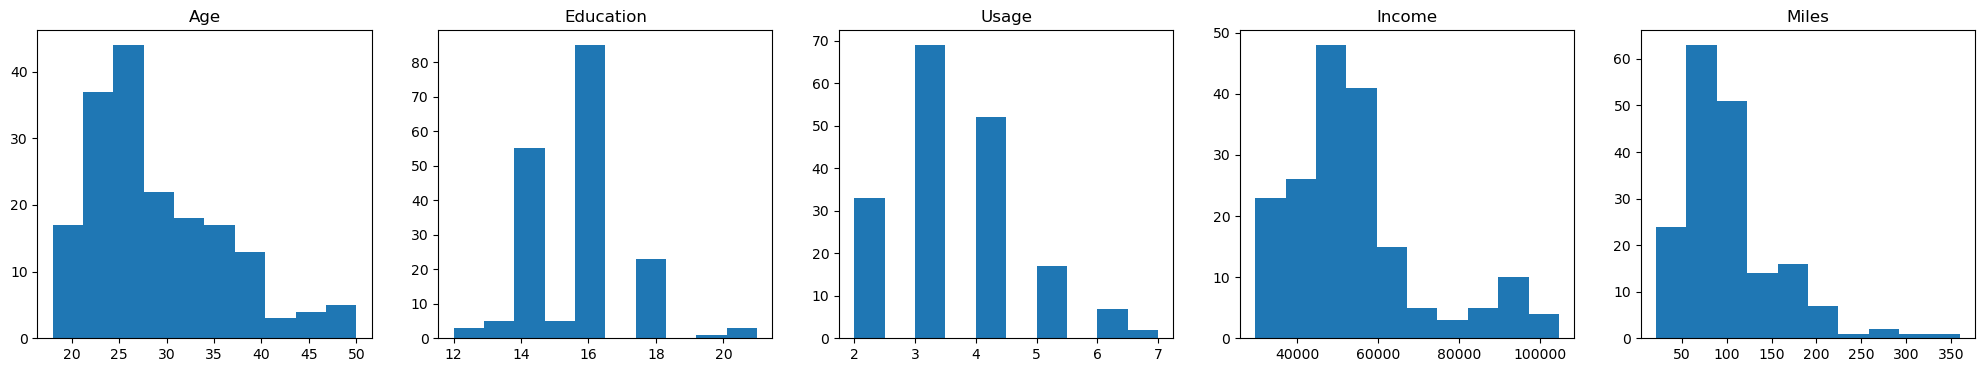

In [12]:
fig, axes = plt.subplots(1,5, figsize=(25,4))
axes = axes.ravel()
for col, ax in zip(fit_df[num_cols], axes):
  ax.hist(fit_df[col])
  ax.set(title=f'{col}', xlabel=None)

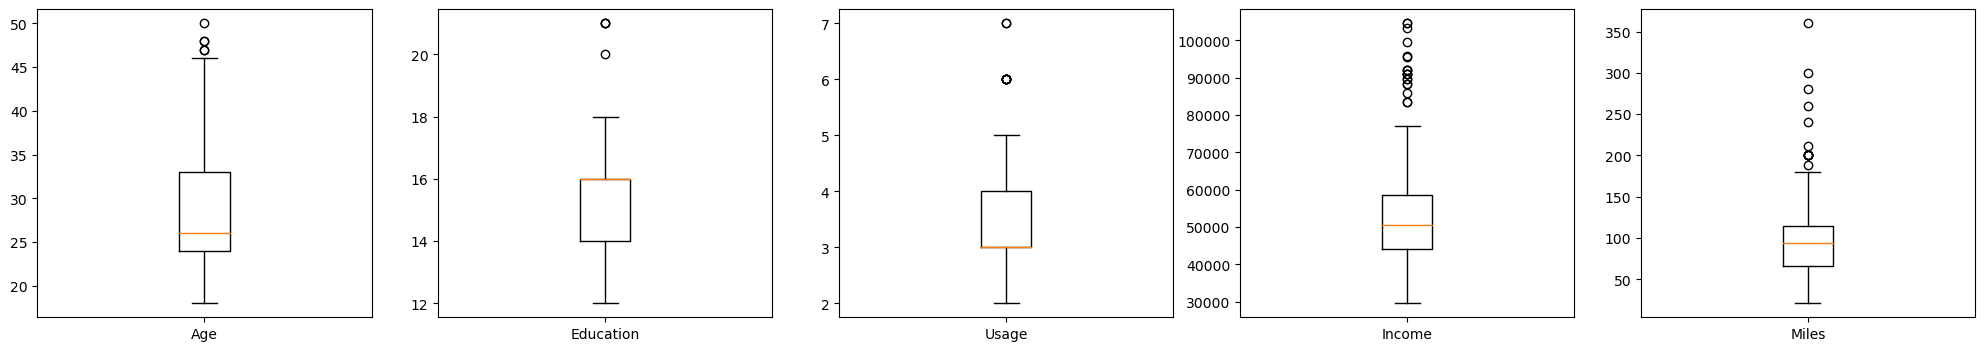

In [13]:
fig, axes = plt.subplots(1,5, figsize=(25,4))
axes = axes.ravel()
for col, ax in zip(fit_df[num_cols], axes):
  ax.boxplot(fit_df[col], labels=[f'{col}'])

Variables categóricas

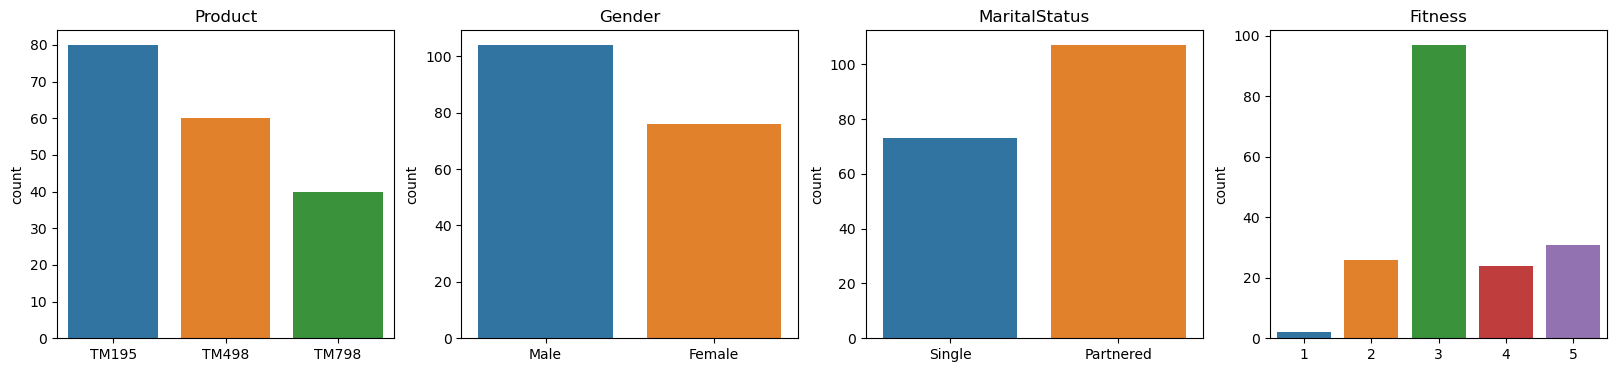

In [14]:
fig, axes = plt.subplots(1,4, figsize=(20,4))
axes = axes.ravel()
for col, ax in zip(fit_df[cat_cols], axes):
  sns.countplot(x=fit_df[col], ax=ax)
  ax.set(title=f'{col}', xlabel=None)

## **Análisis Bivariado**

<Axes: xlabel='Product', ylabel='Age'>

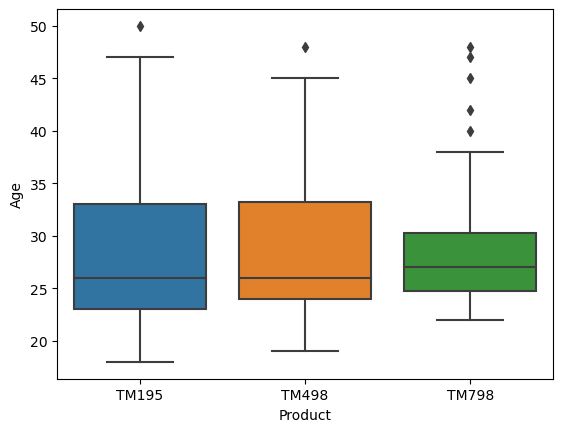

In [15]:
# Para saber si la edad influye en el producto que se compra
sns.boxplot(x='Product', y='Age', data=fit_df)

<Axes: xlabel='Gender', ylabel='Miles'>

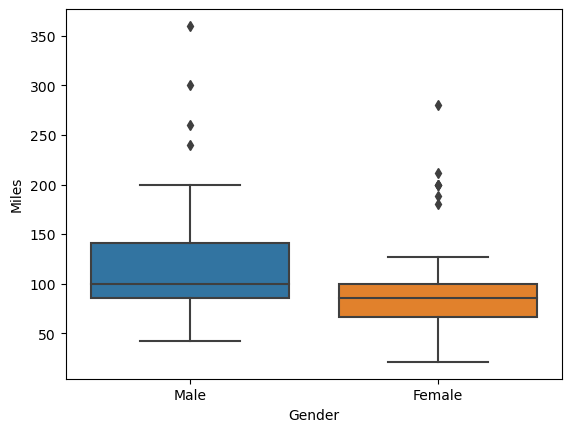

In [16]:
# Para saber si el género influye en la cantidad de millas
sns.boxplot(x='Gender', y='Miles', data=fit_df)

## **Análisis Multivariado**

<Axes: >

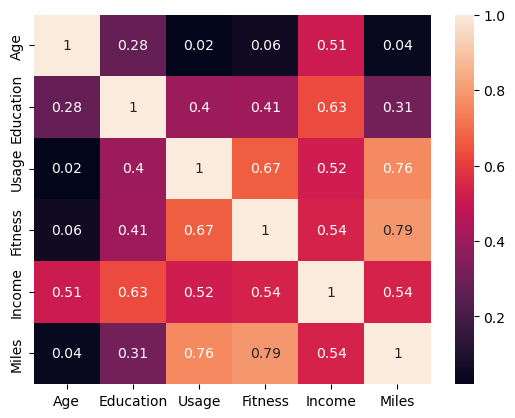

In [17]:
sns.heatmap(round(fit_df.corr(numeric_only=True),2), annot = True)

## **Ingeniería de características**

In [18]:
# Discretización (binning) de la edad
from sklearn.preprocessing import KBinsDiscretizer

grouper = KBinsDiscretizer(n_bins=3, strategy='uniform', encode='onehot-dense')
grouped = grouper.fit_transform(fit_df[['Age']])
grouped = pd.DataFrame(grouped, columns=grouper.get_feature_names_out())
grouped

c:\Users\jmcar\anaconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


,Age_0.0,Age_1.0,Age_2.0
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0
...,...,...,...
175,0.0,0.0,1.0
176,0.0,0.0,1.0
177,0.0,0.0,1.0
178,0.0,0.0,1.0


In [19]:
# Codificación de las variables categóricas de texto
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded = encoder.fit_transform(fit_df[['Product', 'Gender', 'MaritalStatus']])
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out())
encoded_df

,Product_TM498,Product_TM798,Gender_Male,MaritalStatus_Single
0,0.0,0.0,1.0,1.0
1,0.0,0.0,1.0,1.0
2,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,1.0
4,0.0,0.0,1.0,0.0
...,...,...,...,...
175,0.0,1.0,1.0,1.0
176,0.0,1.0,1.0,1.0
177,0.0,1.0,1.0,1.0
178,0.0,1.0,1.0,0.0


In [20]:
# Transformación de las variables numéricas sesgadas
from sklearn.preprocessing import PowerTransformer

transformer = PowerTransformer(method='box-cox', standardize=False)
transf = transformer.fit_transform(fit_df[['Income','Miles']])
transf_df = pd.DataFrame(transf, columns=transformer.get_feature_names_out())
transf_df

,Income,Miles
0,1.365525,3.798889
1,1.365563,3.538352
2,1.365545,3.453180
3,1.365581,3.620744
4,1.365613,3.221864
...,...,...
175,1.365913,4.158393
176,1.365931,4.158393
177,1.365934,4.022388
178,1.365965,3.842717


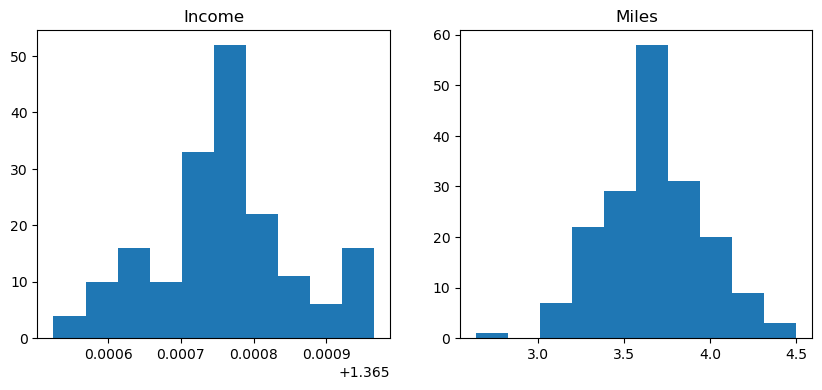

In [21]:
# Transformación de las variables numéricas sesgadas
fig, axes = plt.subplots(1,2, figsize=(10,4))
axes = axes.ravel()
for col, ax in zip(transf_df, axes):
  ax.hist(transf_df[col])
  ax.set(title=f'{col}', xlabel=None)

In [22]:
# Escalamiento de las variables numéricas sesgadas
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
minmax = scaler.fit_transform(transf_df)
minmax_df = pd.DataFrame(minmax, columns=scaler.get_feature_names_out())
minmax_df

,Income,Miles
0,0.000000,0.621619
1,0.087502,0.481626
2,0.045154,0.435861
3,0.127309,0.525897
4,0.200201,0.311569
...,...,...
175,0.881687,0.814790
176,0.921490,0.814790
177,0.928881,0.741711
178,1.000000,0.645169


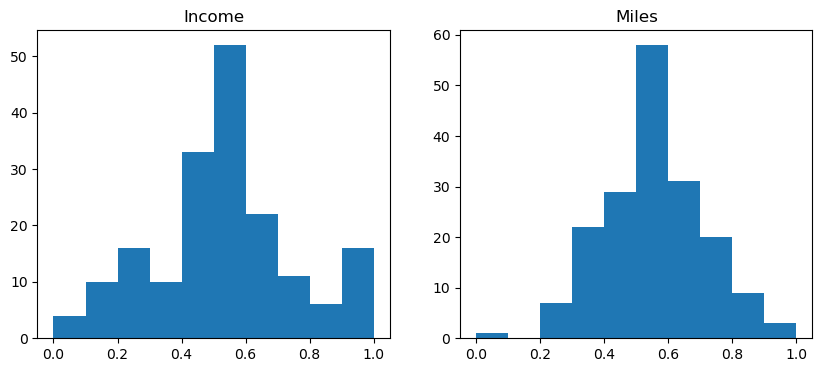

In [23]:
fig, axes = plt.subplots(1,2, figsize=(10,4))
axes = axes.ravel()
for col, ax in zip(minmax_df, axes):
  ax.hist(minmax_df[col])
  ax.set(title=f'{col}', xlabel=None)